## Machine Learning Based Classification for Sentimental analysis of IMDb Reviews

##### Group members: Nisarg Joshi - Wilfried Tcheumaha

## Introduction

 [Git repo](https://github.com/JoshWuuu/Machine-Learning-based-classification-for-Sentimental-analysis-of-IMDb-reviews)

### Description of the paper
The paper focuses on using machine learning algorithms to perform sentiment analysis on IMDb movie reviews. Sentiment analysis is a natural language processing (NLP) task that aims to determine the emotional tone or sentiment expressed in a piece of text. In this context, the paper specifically targets reviews from the IMDb website, which is known for hosting user-generated movie reviews and ratings.

### Problem statement
In the realm of natural language processing (NLP) and sentiment analysis, neural networks have proven to be powerful tools for understanding and classifying the sentiment expressed in text data. However, the performance of neural networks heavily relies on the selection of hyperparameters, which can significantly impact both training efficiency and model effectiveness. This work aims to address the challenge of hyperparameter tuning for neural networks used in text sentiment classification tasks.

### Context of the problem
The search space for hyperparameters can be vast, making manual tuning impractical.
Balancing the trade-off between overfitting and underfitting is a critical challenge.
Different hyperparameters might interact with each other, requiring careful experimentation.

## Implementation paper Code

#### Setting

In [1]:
import numpy as np
import tensorflow as tf
import tensorflow_hub as hub
import keras
import random
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import re
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import nltk
nltk.download('wordnet')
import os

[nltk_data] Downloading package wordnet to /root/nltk_data...


# Data loading

In [2]:
train_data, validation_data, test_data = tfds.load(
    name="imdb_reviews",
    split=('train[:80%]', 'train[20%:]', 'test'),
    as_supervised=True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/3 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/25000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteUMRMCJ/imdb_reviews-train.tfrecord…

Generating test examples...:   0%|          | 0/25000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteUMRMCJ/imdb_reviews-test.tfrecord*…

Generating unsupervised examples...:   0%|          | 0/50000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteUMRMCJ/imdb_reviews-unsupervised.t…

Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0. Subsequent calls will reuse this data.


In [3]:
# Mounting the drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [8]:
import shutil

# Source directory
source_dir = '/root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0'

# Destination directory in your Google Drive
destination_dir = '/content/gdrive/MyDrive/Colab Notebooks/Machine learning Programming/Sequence_model/imdb_reviews_data'

# Copy the data
shutil.copytree(source_dir, destination_dir)

'/content/gdrive/MyDrive/Colab Notebooks/Machine learning Programming/Sequence_model/imdb_reviews_data'

In [9]:
import os

# List the contents of the destination directory
destination_contents = os.listdir(destination_dir)
print(destination_contents)

['imdb_reviews-train.tfrecord-00000-of-00001', 'imdb_reviews-unsupervised.tfrecord-00000-of-00001', 'label.labels.txt', 'dataset_info.json', 'imdb_reviews-test.tfrecord-00000-of-00001', 'features.json']


# N-gram model

## Binary, Word_count, Tfidf

In [13]:

# Path to the TFRecord file
path = '/content/gdrive/MyDrive/Colab Notebooks/Machine learning Programming/Sequence_model/imdb_reviews_data/imdb_reviews-train.tfrecord-00000-of-00001'

reviews_train = []

# Open the TFRecord file
for record in tf.data.TFRecordDataset(path):
    # Parse the record
    example = tf.train.Example()
    example.ParseFromString(record.numpy())

    # Access the feature you need (e.g., 'text' in this case)
    text = example.features.feature['text'].bytes_list.value[0].decode('utf-8')

    reviews_train.append(text)

# Print a few reviews to verify
for review in reviews_train[:5]:
    print(review)


This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not redeem this movie's ridiculous storyline. This movie is an early nineties US propaganda piece. The most pathetic scenes were those when the Columbian rebels were making their cases for revolutions. Maria Conchita Alonso appeared phony, and her pseudo-love affair with Walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning. I am disappointed that there are movies like this, ruining actor's like Christopher Walken's good name. I could barely sit through it.
I have been known to fall asleep during films, but this is usually due to a combination of things including, really tired, being warm and comfortable on the sette and having just eaten a lot. However on this occasion I fell asleep because the film was rubbish. The plot development was cons

In [16]:
import tensorflow as tf

# Path to the TFRecord file for testing data
path_test = '/content/gdrive/MyDrive/Colab Notebooks/Machine learning Programming/Sequence_model/imdb_reviews_data/imdb_reviews-test.tfrecord-00000-of-00001'

reviews_test = []

# Open the TFRecord file for testing data
for record in tf.data.TFRecordDataset(path_test):
    # Parse the record
    example = tf.train.Example()
    example.ParseFromString(record.numpy())

    # Access the feature you need (e.g., 'text' in this case)
    text = example.features.feature['text'].bytes_list.value[0].decode('utf-8')

    reviews_test.append(text)

# Print a few reviews to verify
for review in reviews_test[:5]:
    print(review)


There are films that make careers. For George Romero, it was NIGHT OF THE LIVING DEAD; for Kevin Smith, CLERKS; for Robert Rodriguez, EL MARIACHI. Add to that list Onur Tukel's absolutely amazing DING-A-LING-LESS. Flawless film-making, and as assured and as professional as any of the aforementioned movies. I haven't laughed this hard since I saw THE FULL MONTY. (And, even then, I don't think I laughed quite this hard... So to speak.) Tukel's talent is considerable: DING-A-LING-LESS is so chock full of double entendres that one would have to sit down with a copy of this script and do a line-by-line examination of it to fully appreciate the, uh, breadth and width of it. Every shot is beautifully composed (a clear sign of a sure-handed director), and the performances all around are solid (there's none of the over-the-top scenery chewing one might've expected from a film like this). DING-A-LING-LESS is a film whose time has come.
A blackly comic tale of a down-trodden priest, Nazarin showc

In [17]:
train_label = [1 if i < 12500 else 0 for i in range(25000)]
test_label = [1 if i < 12500 else 0 for i in range(25000)]

In [18]:
X_train, X_val, y_train, y_val = train_test_split(
    reviews_train, train_label, train_size=0.8
)

In [19]:
REPLACE_NO_SPACE = re.compile("[.;:!\'?,\"()\[\]]")
REPLACE_WITH_SPACE = re.compile("(<br\s*/><br\s*/>)|(\-)|(\/)")
def preprocess_reviews(reviews):
  reviews = [REPLACE_NO_SPACE.sub("", line.lower()) for line in reviews]
  reviews = [REPLACE_WITH_SPACE.sub(" ", line) for line in reviews]
  return reviews

reviews_train_clean = preprocess_reviews(X_train)
reviews_val_clean = preprocess_reviews(X_val)
reviews_test_clean = preprocess_reviews(reviews_test)

In [20]:
def get_lemmatized_text(corpus):
  lemmatizer = WordNetLemmatizer()
  return [' '.join([lemmatizer.lemmatize(word) for word in review.split()]) for review in corpus]

reviews_train_clean = get_lemmatized_text(reviews_train_clean)
reviews_val_clean = get_lemmatized_text(reviews_val_clean)
reviews_test_clean = get_lemmatized_text(reviews_test_clean)

In [21]:
models = []
models.append(('Logistic', LogisticRegression(C=0.05)))
models.append(('RF', RandomForestClassifier()))
models.append(('Boosting', GradientBoostingClassifier(max_depth= 5)))
models.append(('SVC', LinearSVC(C=0.05)))
# models.append(('DNN', MLPClassifier(hidden_layer_sizes=(30,30,20,10,10), activation='logistic', early_stopping=True)))
stop_words = ['in', 'of', 'at', 'a', 'the']
preprocessing = []
preprocessing.append(('Binary', CountVectorizer(binary=True, stop_words=stop_words)))
preprocessing.append(('Count', CountVectorizer(binary=False, ngram_range=(1,3), stop_words=stop_words)))
preprocessing.append(('Tf-idf', TfidfVectorizer(ngram_range=(1, 3), stop_words=stop_words)))
# evaluate each model in turn
val_accuracy = []
test_accuracy = []
names = []
for preprocess_name, preprocess_method in preprocessing:
  preprocess_method = preprocess_method.fit(reviews_train_clean)
  X_train = preprocess_method.transform(reviews_train_clean)
  X_val = preprocess_method.transform(reviews_val_clean)
  X_test = preprocess_method.transform(reviews_test_clean)
  for name, model in models:
    model.fit(X_train, y_train)
    val_label = model.predict(X_val)
    val_accuracy.append(accuracy_score(val_label, y_val))
    y_pred = model.predict(X_test)
    test_accuracy.append(accuracy_score(test_label, y_pred))
    names.append(name + '-' + preprocess_name)
    print('%s val_accuracy: %f, test_accuracy: %f' % (name + '-' + preprocess_name, accuracy_score(val_label, y_val), accuracy_score(test_label, y_pred)))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic-Binary val_accuracy: 0.504200, test_accuracy: 0.497760
RF-Binary val_accuracy: 0.506000, test_accuracy: 0.496480
Boosting-Binary val_accuracy: 0.495000, test_accuracy: 0.500360
SVC-Binary val_accuracy: 0.500600, test_accuracy: 0.496800


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic-Count val_accuracy: 0.507400, test_accuracy: 0.499160
RF-Count val_accuracy: 0.500800, test_accuracy: 0.503280
Boosting-Count val_accuracy: 0.498600, test_accuracy: 0.499560


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


SVC-Count val_accuracy: 0.511800, test_accuracy: 0.499360
Logistic-Tf-idf val_accuracy: 0.509000, test_accuracy: 0.500400
RF-Tf-idf val_accuracy: 0.490000, test_accuracy: 0.503600
Boosting-Tf-idf val_accuracy: 0.487200, test_accuracy: 0.495600
SVC-Tf-idf val_accuracy: 0.511200, test_accuracy: 0.499400


### Performance

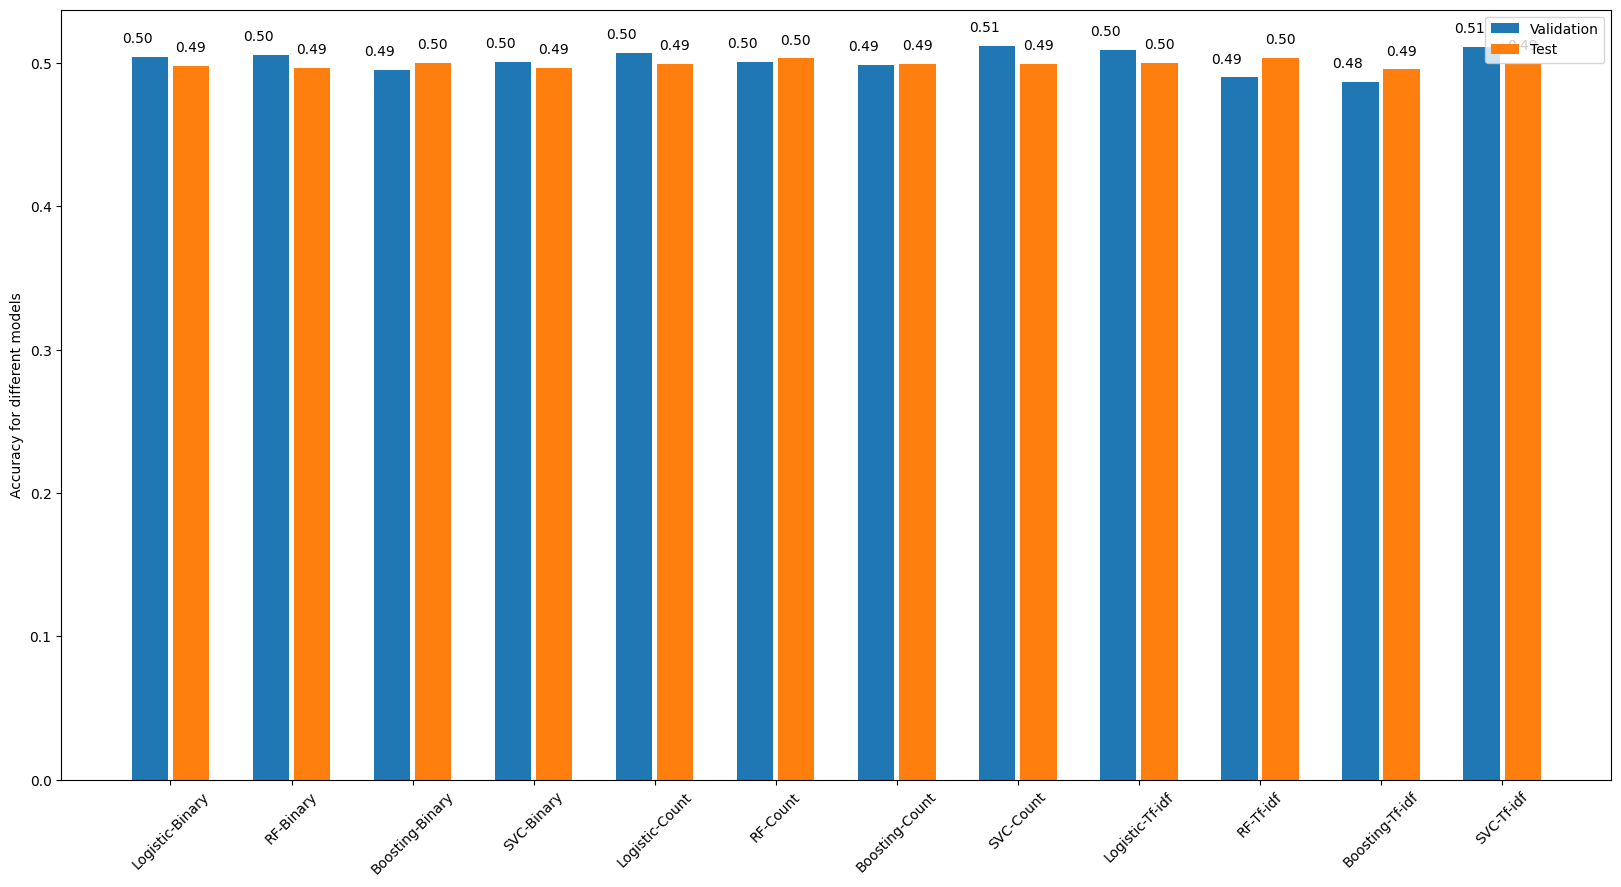

In [22]:
x = np.arange(len(names))

width = 0.3
plt.figure(figsize = (20, 10))
plt.bar(x - 0.17, val_accuracy, width, label='Validation')
plt.bar(x + 0.17, test_accuracy, width, label='Test')
plt.xticks(ticks=x, labels=names,
           rotation=45)
for index, value in enumerate(val_accuracy):
    plt.text(index - 0.4, value+0.01, str(value)[0:4])
for index, value in enumerate(test_accuracy):
    plt.text(index + 0.04, value + 0.01, str(value)[0:4])
plt.ylabel(f'Accuracy for different models')
_ = plt.legend()

## Word Embedding

Use three embedding methods, NNLM 50, NNLM 128, NNLM 128 with normalization and universal encoder

In [24]:
class dense_embedding(tf.keras.Model):

  def __init__(self, input):
    super(dense_embedding, self).__init__()
    self.hub_layer = hub.KerasLayer(input, input_shape=[],
                           dtype=tf.string, trainable=True)
    self.dense1 = tf.keras.layers.Dense(64, activation='relu')
    self.dense2 = tf.keras.layers.Dense(32, activation='relu')
    self.res = tf.keras.layers.Dense(1, activation='sigmoid')

  def call(self, x):
    x = self.hub_layer(x)
    x = self.dense1(x)
    x = self.dense2(x)
    return self.res(x)

embedding_50 = "https://tfhub.dev/google/nnlm-en-dim50/2"
model = dense_embedding(embedding_50)

In [25]:
MAX_EPOCHS = 30

def compile_and_fit(model, patience=2):
  early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=patience,
                                                    mode='min')
  lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=1e-3,
    decay_steps=500,
    decay_rate=0.9)
  model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

  history = model.fit(train_data.batch(512), epochs=MAX_EPOCHS,
                      validation_data=validation_data.batch(512))
                      # ,callbacks=[early_stopping])
  return history

In [26]:
embedding_50 = "https://tfhub.dev/google/nnlm-en-dim50/2"
hub_layer = hub.KerasLayer(embedding_50, input_shape=[],
                           dtype=tf.string, trainable=True)


model50 = tf.keras.Sequential()
model50.add(hub_layer)
model50.add(tf.keras.layers.Dense(64, activation='relu'))
model50.add(tf.keras.layers.Dense(32, activation='relu'))
model50.add(tf.keras.layers.Dense(1, activation='sigmoid'))

model50.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_1 (KerasLayer)  (None, 50)                48190600  
                                                                 
 dense_3 (Dense)             (None, 64)                3264      
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 48,195,977
Trainable params: 48,195,977
Non-trainable params: 0
_________________________________________________________________


In [27]:
history = compile_and_fit(model50)

performance = {}
val_performance = {}
val_performance['nlnm 50'] = model50.evaluate(validation_data.batch(512))
performance['nlnm 50'] = model50.evaluate(test_data.batch(512))

Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/backend.py:5703: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


40/40 [==============================] - 21s 372ms/step - loss: 0.6310 - accuracy: 0.6817 - val_loss: 0.4992 - val_accuracy: 0.7982
Epoch 2/30
40/40 [==============================] - 5s 119ms/step - loss: 0.3794 - accuracy: 0.8453 - val_loss: 0.2706 - val_accuracy: 0.8935
Epoch 3/30
40/40 [==============================] - 2s 59ms/step - loss: 0.2188 - accuracy: 0.9153 - val_loss: 0.1843 - val_accuracy: 0.9330
Epoch 4/30
40/40 [==============================] - 3s 69ms/step - loss: 0.1299 - accuracy: 0.9568 - val_loss: 0.1399 - val_accuracy: 0.9535
Epoch 5/30
40/40 [==============================] - 3s 67ms/step - loss: 0.0719 - accuracy: 0.9804 - val_loss: 0.1282 - val_accuracy: 0.9589
Epoch 6/30
40/40 [==============================] - 2s 59ms/step - loss: 0.0405 - accuracy: 0.9913 - val_loss: 0.1355 - val_accuracy: 0.9609
Epoch 7/30
40/40 [==============================] - 2s 60ms/step - loss: 0.0445 - accuracy: 0.9852 - val_loss: 0.1467 - val_accuracy: 0.9596
Epoch 8/30
40/40 [===

In [28]:
embedding_50 = "https://tfhub.dev/google/nnlm-en-dim128/2"
hub_layer = hub.KerasLayer(embedding_50, input_shape=[],
                           dtype=tf.string, trainable=True)


model128 = tf.keras.Sequential()
model128.add(hub_layer)
model128.add(tf.keras.layers.Dense(64, activation='relu'))
model128.add(tf.keras.layers.Dense(32, activation='relu'))
model128.add(tf.keras.layers.Dense(1, activation='sigmoid'))

model128.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_2 (KerasLayer)  (None, 128)               124642688 
                                                                 
 dense_6 (Dense)             (None, 64)                8256      
                                                                 
 dense_7 (Dense)             (None, 32)                2080      
                                                                 
 dense_8 (Dense)             (None, 1)                 33        
                                                                 
Total params: 124,653,057
Trainable params: 124,653,057
Non-trainable params: 0
_________________________________________________________________


In [29]:
history = compile_and_fit(model128)

val_performance['nlnm 128'] = model128.evaluate(validation_data.batch(512))
performance['nlnm 128'] = model128.evaluate(test_data.batch(512))

Epoch 1/30
40/40 [==============================] - 14s 309ms/step - loss: 0.5367 - accuracy: 0.7541 - val_loss: 0.3347 - val_accuracy: 0.8705
Epoch 2/30
40/40 [==============================] - 3s 87ms/step - loss: 0.2578 - accuracy: 0.8982 - val_loss: 0.1848 - val_accuracy: 0.9351
Epoch 3/30
40/40 [==============================] - 3s 76ms/step - loss: 0.1319 - accuracy: 0.9564 - val_loss: 0.1269 - val_accuracy: 0.9592
Epoch 4/30
40/40 [==============================] - 4s 98ms/step - loss: 0.0684 - accuracy: 0.9809 - val_loss: 0.1159 - val_accuracy: 0.9640
Epoch 5/30
40/40 [==============================] - 3s 77ms/step - loss: 0.0298 - accuracy: 0.9941 - val_loss: 0.1226 - val_accuracy: 0.9650
Epoch 6/30
40/40 [==============================] - 3s 78ms/step - loss: 0.0139 - accuracy: 0.9983 - val_loss: 0.1264 - val_accuracy: 0.9656
Epoch 7/30
40/40 [==============================] - 5s 129ms/step - loss: 0.0071 - accuracy: 0.9995 - val_loss: 0.1243 - val_accuracy: 0.9675
Epoch 8/30

In [30]:
embedding_50 = "https://tfhub.dev/google/nnlm-en-dim128-with-normalization/2"
hub_layer = hub.KerasLayer(embedding_50, input_shape=[],
                           dtype=tf.string, trainable=True)


model128_norm = tf.keras.Sequential()
model128_norm.add(hub_layer)
model128_norm.add(tf.keras.layers.Dense(64, activation='relu'))
model128_norm.add(tf.keras.layers.Dense(32, activation='relu'))
model128_norm.add(tf.keras.layers.Dense(1, activation='sigmoid'))

model128_norm.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_3 (KerasLayer)  (None, 128)               124642688 
                                                                 
 dense_9 (Dense)             (None, 64)                8256      
                                                                 
 dense_10 (Dense)            (None, 32)                2080      
                                                                 
 dense_11 (Dense)            (None, 1)                 33        
                                                                 
Total params: 124,653,057
Trainable params: 124,653,057
Non-trainable params: 0
_________________________________________________________________


In [31]:
history = compile_and_fit(model128_norm)

val_performance['nlnm 128_norm'] = model128_norm.evaluate(validation_data.batch(512))
performance['nlnm 128_norm'] = model128_norm.evaluate(test_data.batch(512))

Epoch 1/30
40/40 [==============================] - 15s 330ms/step - loss: 0.5358 - accuracy: 0.7496 - val_loss: 0.3112 - val_accuracy: 0.8839
Epoch 2/30
40/40 [==============================] - 4s 91ms/step - loss: 0.2378 - accuracy: 0.9075 - val_loss: 0.1647 - val_accuracy: 0.9416
Epoch 3/30
40/40 [==============================] - 5s 120ms/step - loss: 0.1249 - accuracy: 0.9565 - val_loss: 0.1154 - val_accuracy: 0.9608
Epoch 4/30
40/40 [==============================] - 4s 90ms/step - loss: 0.0684 - accuracy: 0.9791 - val_loss: 0.1003 - val_accuracy: 0.9678
Epoch 5/30
40/40 [==============================] - 4s 92ms/step - loss: 0.0396 - accuracy: 0.9899 - val_loss: 0.0971 - val_accuracy: 0.9700
Epoch 6/30
40/40 [==============================] - 5s 127ms/step - loss: 0.0220 - accuracy: 0.9952 - val_loss: 0.0921 - val_accuracy: 0.9723
Epoch 7/30
40/40 [==============================] - 5s 118ms/step - loss: 0.0077 - accuracy: 0.9992 - val_loss: 0.0991 - val_accuracy: 0.9711
Epoch 8/

### Comparison

Make the embedding layers trainable improve the performance.

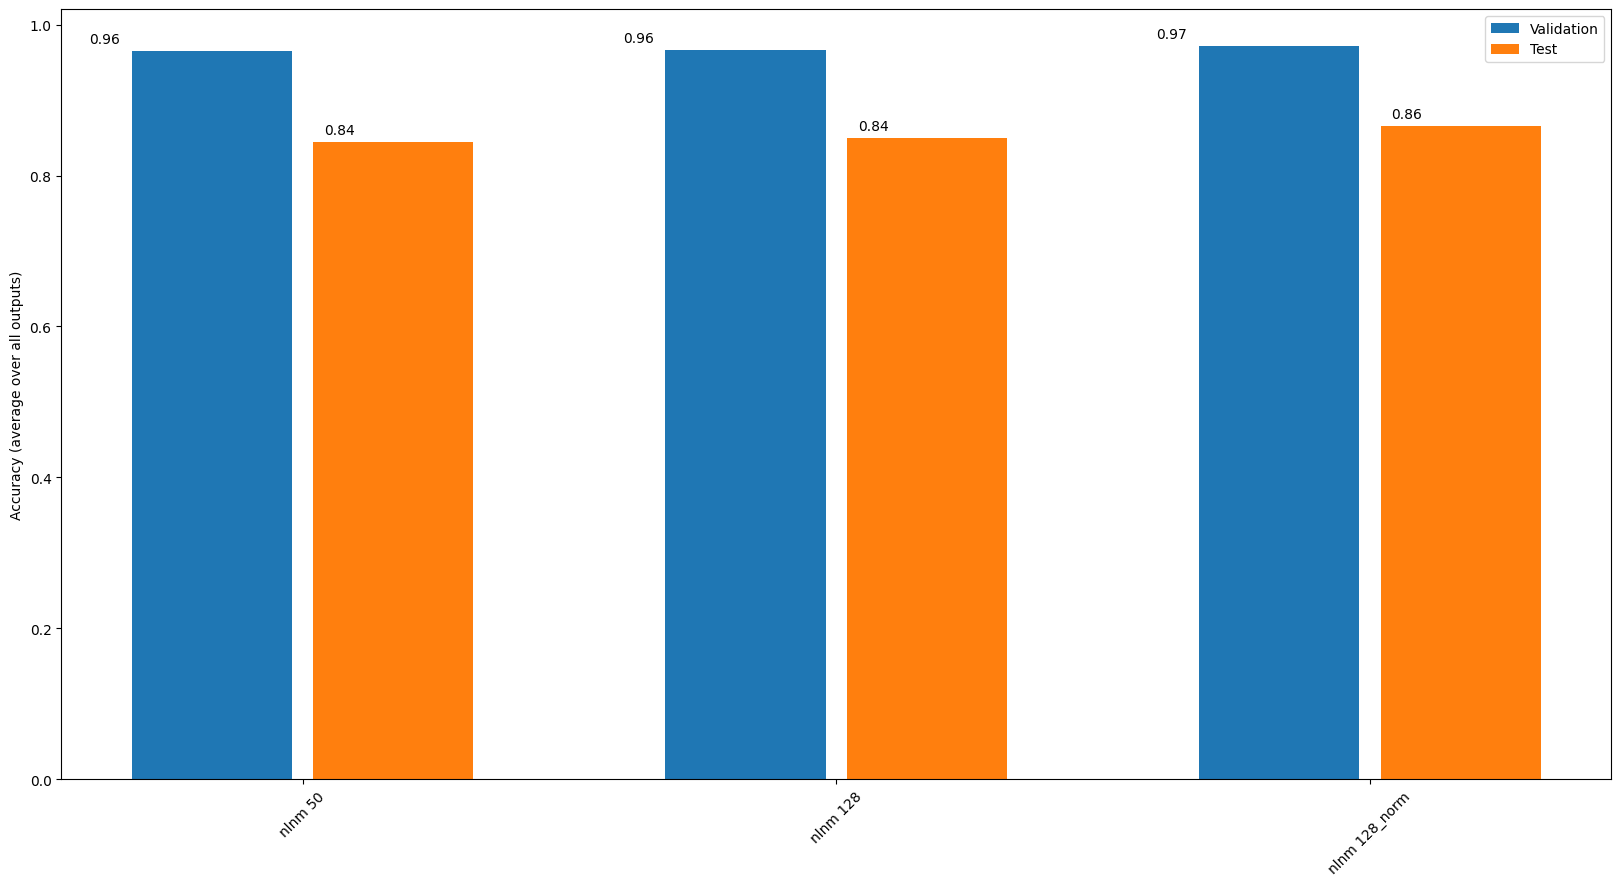

In [34]:
x = np.arange(len(performance))
width = 0.3

metric_name = 'accuracy'
metric_index = model512.metrics_names.index('accuracy')
val_mae = [v[metric_index] for v in val_performance.values()]
test_mae = [v[metric_index] for v in performance.values()]

plt.figure(figsize = (20, 10))
plt.bar(x - 0.17, val_mae, width, label='Validation')
plt.bar(x + 0.17, test_mae, width, label='Test')
plt.xticks(ticks=x, labels=performance.keys(),
           rotation=45)
for index, value in enumerate(val_mae):
    plt.text(index - 0.4, value+0.01, str(value)[0:4])
for index, value in enumerate(test_mae):
    plt.text(index + 0.04, value + 0.01, str(value)[0:4])
plt.ylabel('Accuracy (average over all outputs)')

_ = plt.legend()

### Contribution code


##### The word embeddings outperfmored traditional machine learnings methods. However , Adjusting the number of epochs is an important aspect of training a neural network. The number of epochs determines how many times your model will iterate over the entire training dataset during the training process. Deciding the appropriate number of epochs is crucial to prevent both underfitting (too few epochs) and overfitting (too many epochs). During the training, we observed a model congergence after 20 epochs. We therefore suggested to repeat the training using for a number of epochs equal to 20 and see the impact

### Results

In [39]:
MAX_EPOCHS = 20

def compile_and_fit(model, patience=2):
  early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=patience,
                                                    mode='min')
  lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=1e-3,
    decay_steps=500,
    decay_rate=0.9)
  model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

  history = model.fit(train_data.batch(512), epochs=MAX_EPOCHS,
                      validation_data=validation_data.batch(512))
                      # ,callbacks=[early_stopping])
  return history

In [40]:
embedding_50 = "https://tfhub.dev/google/nnlm-en-dim50/2"
hub_layer = hub.KerasLayer(embedding_50, input_shape=[],
                           dtype=tf.string, trainable=True)


model50 = tf.keras.Sequential()
model50.add(hub_layer)
model50.add(tf.keras.layers.Dense(64, activation='relu'))
model50.add(tf.keras.layers.Dense(32, activation='relu'))
model50.add(tf.keras.layers.Dense(1, activation='sigmoid'))

model50.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_5 (KerasLayer)  (None, 50)                48190600  
                                                                 
 dense_15 (Dense)            (None, 64)                3264      
                                                                 
 dense_16 (Dense)            (None, 32)                2080      
                                                                 
 dense_17 (Dense)            (None, 1)                 33        
                                                                 
Total params: 48,195,977
Trainable params: 48,195,977
Non-trainable params: 0
_________________________________________________________________


In [41]:
history = compile_and_fit(model50)

performance = {}
val_performance = {}
val_performance['nlnm 50'] = model50.evaluate(validation_data.batch(512))
performance['nlnm 50'] = model50.evaluate(test_data.batch(512))

Epoch 1/20
40/40 [==============================] - 13s 300ms/step - loss: 0.6076 - accuracy: 0.6894 - val_loss: 0.4645 - val_accuracy: 0.8028
Epoch 2/20
40/40 [==============================] - 2s 62ms/step - loss: 0.3612 - accuracy: 0.8532 - val_loss: 0.2635 - val_accuracy: 0.8979
Epoch 3/20
40/40 [==============================] - 3s 71ms/step - loss: 0.2134 - accuracy: 0.9198 - val_loss: 0.1814 - val_accuracy: 0.9345
Epoch 4/20
40/40 [==============================] - 4s 97ms/step - loss: 0.1282 - accuracy: 0.9584 - val_loss: 0.1374 - val_accuracy: 0.9541
Epoch 5/20
40/40 [==============================] - 3s 67ms/step - loss: 0.0730 - accuracy: 0.9802 - val_loss: 0.1218 - val_accuracy: 0.9616
Epoch 6/20
40/40 [==============================] - 3s 72ms/step - loss: 0.0430 - accuracy: 0.9905 - val_loss: 0.1684 - val_accuracy: 0.9489
Epoch 7/20
40/40 [==============================] - 2s 61ms/step - loss: 0.0400 - accuracy: 0.9892 - val_loss: 0.1210 - val_accuracy: 0.9656
Epoch 8/20


In [42]:
history = compile_and_fit(model128)

val_performance['nlnm 128'] = model128.evaluate(validation_data.batch(512))
performance['nlnm 128'] = model128.evaluate(test_data.batch(512))

Epoch 1/20
40/40 [==============================] - 15s 254ms/step - loss: 9.4591e-05 - accuracy: 1.0000 - val_loss: 0.2245 - val_accuracy: 0.9660
Epoch 2/20
40/40 [==============================] - 4s 88ms/step - loss: 2.2680e-05 - accuracy: 1.0000 - val_loss: 0.2398 - val_accuracy: 0.9657
Epoch 3/20
40/40 [==============================] - 6s 141ms/step - loss: 8.7493e-06 - accuracy: 1.0000 - val_loss: 0.2484 - val_accuracy: 0.9656
Epoch 4/20
40/40 [==============================] - 3s 76ms/step - loss: 5.9299e-06 - accuracy: 1.0000 - val_loss: 0.2550 - val_accuracy: 0.9657
Epoch 5/20
40/40 [==============================] - 5s 135ms/step - loss: 4.3324e-06 - accuracy: 1.0000 - val_loss: 0.2608 - val_accuracy: 0.9657
Epoch 6/20
40/40 [==============================] - 4s 102ms/step - loss: 3.3914e-06 - accuracy: 1.0000 - val_loss: 0.2659 - val_accuracy: 0.9657
Epoch 7/20
40/40 [==============================] - 3s 76ms/step - loss: 2.7439e-06 - accuracy: 1.0000 - val_loss: 0.2706 - v

In [43]:
history = compile_and_fit(model128_norm)

val_performance['nlnm 128_norm'] = model128_norm.evaluate(validation_data.batch(512))
performance['nlnm 128_norm'] = model128_norm.evaluate(test_data.batch(512))

Epoch 1/20
40/40 [==============================] - 14s 296ms/step - loss: 1.6122e-05 - accuracy: 1.0000 - val_loss: 0.1979 - val_accuracy: 0.9722
Epoch 2/20
40/40 [==============================] - 4s 100ms/step - loss: 3.3946e-06 - accuracy: 1.0000 - val_loss: 0.2150 - val_accuracy: 0.9718
Epoch 3/20
40/40 [==============================] - 9s 238ms/step - loss: 1.2425e-06 - accuracy: 1.0000 - val_loss: 0.2249 - val_accuracy: 0.9718
Epoch 4/20
40/40 [==============================] - 4s 104ms/step - loss: 8.1693e-07 - accuracy: 1.0000 - val_loss: 0.2294 - val_accuracy: 0.9718
Epoch 5/20
40/40 [==============================] - 4s 94ms/step - loss: 5.7499e-07 - accuracy: 1.0000 - val_loss: 0.2331 - val_accuracy: 0.9719
Epoch 6/20
40/40 [==============================] - 5s 136ms/step - loss: 4.3856e-07 - accuracy: 1.0000 - val_loss: 0.2370 - val_accuracy: 0.9719
Epoch 7/20
40/40 [==============================] - 4s 92ms/step - loss: 3.5412e-07 - accuracy: 1.0000 - val_loss: 0.2406 - 

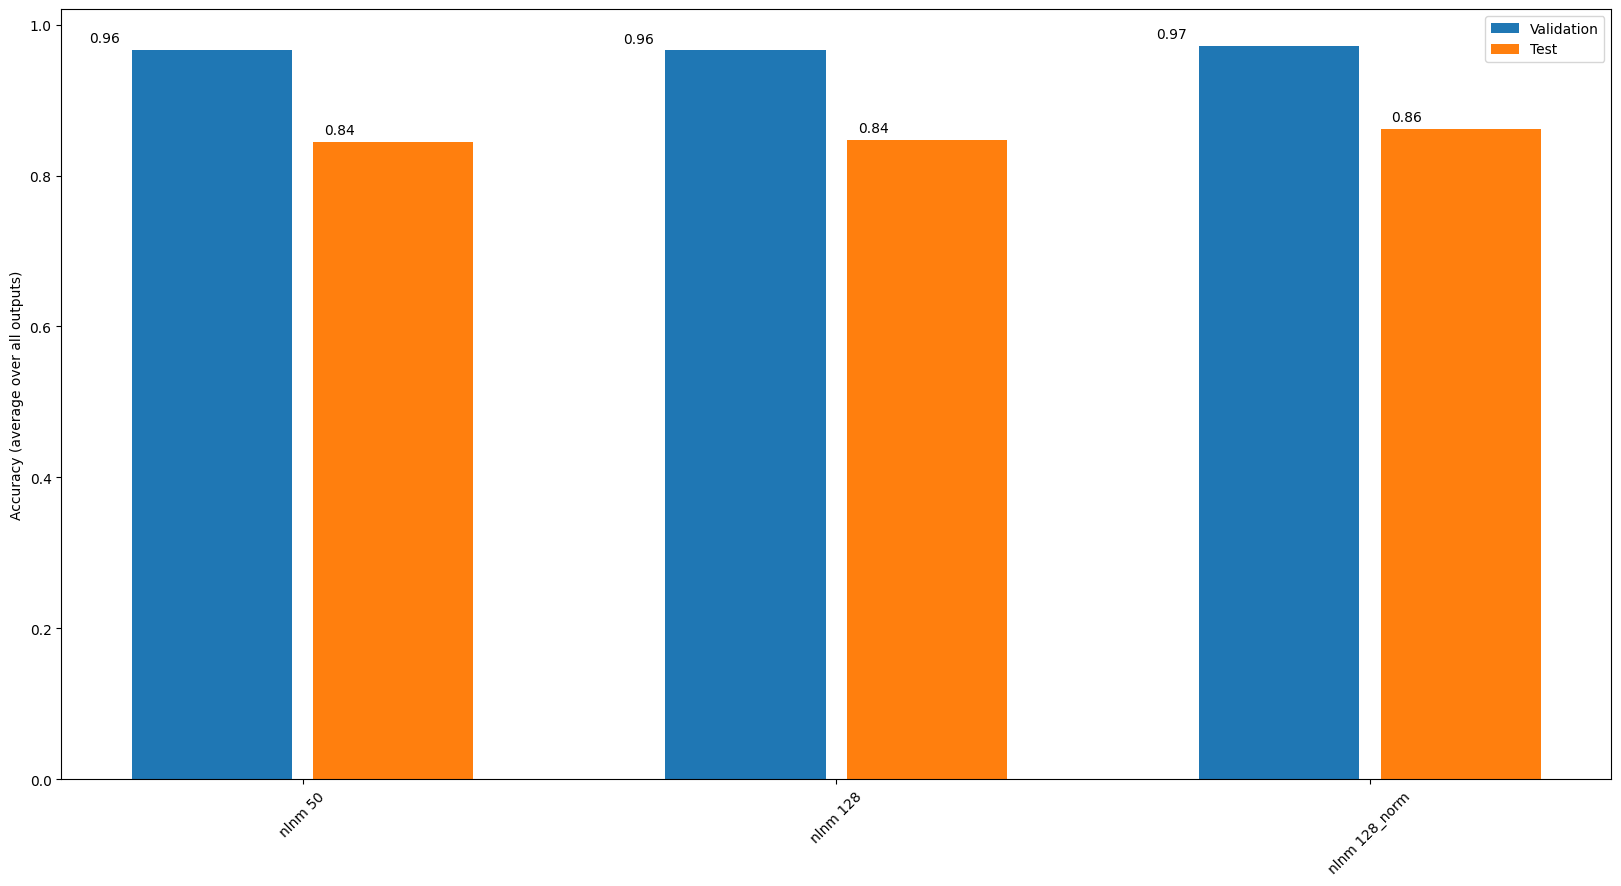

In [44]:
x = np.arange(len(performance))
width = 0.3

metric_name = 'accuracy'
metric_index = model512.metrics_names.index('accuracy')
val_mae = [v[metric_index] for v in val_performance.values()]
test_mae = [v[metric_index] for v in performance.values()]

plt.figure(figsize = (20, 10))
plt.bar(x - 0.17, val_mae, width, label='Validation')
plt.bar(x + 0.17, test_mae, width, label='Test')
plt.xticks(ticks=x, labels=performance.keys(),
           rotation=45)
for index, value in enumerate(val_mae):
    plt.text(index - 0.4, value+0.01, str(value)[0:4])
for index, value in enumerate(test_mae):
    plt.text(index + 0.04, value + 0.01, str(value)[0:4])
plt.ylabel('Accuracy (average over all outputs)')

_ = plt.legend()

### Conclusion and future direction
#### Training a neural network can be time-consuming, especially when using complex architectures or large datasets. Reducing the number of epochs has proven to significantly speed up the training process, allowing you to iterate and experiment more quickly.Moreover, it helped prevent overfitting by limiting the amount of exposure the model has to the training data. Furthermore, reducing the number of epochs can help conserve GPU memory and processing power resources, making it more feasible to train models on less powerful hardware or in resource-constrained environments. Further analysis would also call for layer dropout or learning rate regularization.